<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

### Nu-Support Vector Regression(Nu-SVR) With Normalization And Quantile Transformer

This Code template is for regression analysis using a Nu-Support Vector Regressor(NuSVR) based on the Support Vector Machine algorithm with QuantileTransformer as Feature Transformation Technique and Normalization for Feature Scaling in a pipeline.

# Required Packages


In [1]:
import warnings
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as se 
from sklearn.preprocessing import QuantileTransformer, normalize
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVR 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
warnings.filterwarnings('ignore')

# Initialization

Path for csv file

In [2]:
#filepath
file_path= ""

In [3]:
#x_values
features=[]

In [4]:
#y_value
target=''

# Data fetching
pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [5]:
#read_csv
df=pd.read_csv(file_path)
df.head()

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
0,0,19,182,2,0,0,0,1,0,2523
1,0,33,155,3,0,0,0,0,3,2551
2,0,20,105,1,1,0,0,0,1,2557
3,0,21,108,1,1,0,0,1,2,2594
4,0,18,107,1,1,0,0,1,0,2600


# Feature Selections
We will assign all the required input features to X and target/outcome to Y.

In [6]:
#Get training and testing dataset 
X=df[features]
Y=df[target]

# Data Preprocessing
Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.

In [7]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

Calling preprocessing functions on the feature and target set.

In [8]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=NullClearner(Y)
X.head()

,low,age,lwt,race,smoke,ptl,ht,ui,ftv
0,0,19,182,2,0,0,0,1,0
1,0,33,155,3,0,0,0,0,3
2,0,20,105,1,1,0,0,0,1
3,0,21,108,1,1,0,0,1,2
4,0,18,107,1,1,0,0,1,0


# Correlation Map
In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

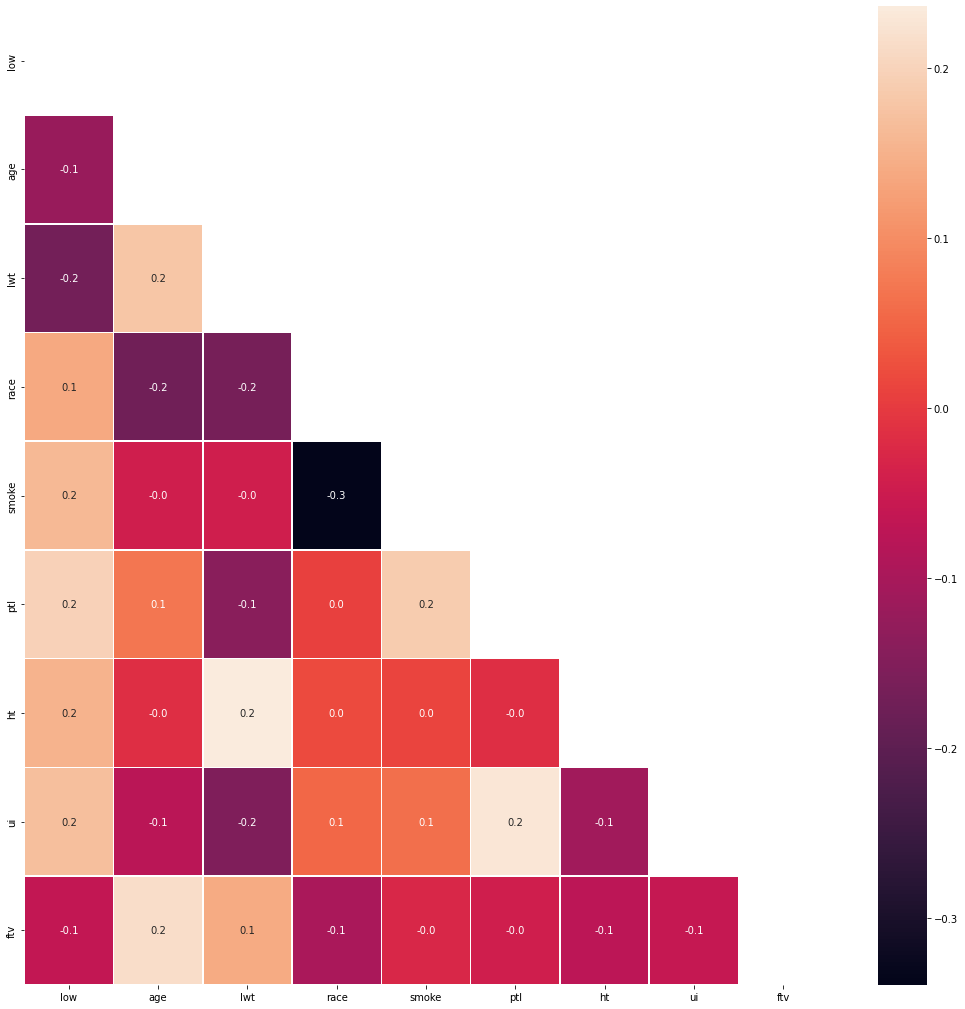

In [9]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

# Data Splitting
The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=120)

# Normalize
Normalizer normalizes samples individually to unit norm where each sample (i.e. each row) with at least one non zero component is rescaled independently of other samples so that its norm (l1, l2 or inf) equals one.
We will fit an object of Normalizer to train data then transform the same data via fit_transform(X_train) method, following which we will transform test data via transform(X_test) method.

In [11]:
x_train = normalize(x_train)
x_test = normalize(x_test)

# Model
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

A Support Vector Machine is a discriminative classifier formally defined by a separating hyperplane. In other terms, for a given known/labelled data points, the SVM outputs an appropriate hyperplane that classifies the inputted new cases based on the hyperplane. In 2-Dimensional space, this hyperplane is a line separating a plane into two segments where each class or group occupied on either side.

Here we will use NuSVR, the NuSVR implementation is based on libsvm. Similar to NuSVC, for regression, uses a parameter nu to control the number of support vectors. However, unlike NuSVC, where nu replaces C, here nu replaces the parameter epsilon of epsilon-SVR.

### Model Tuning Parameters
#### 1. nu : float, default=0.5

An upper bound on the fraction of training errors and a lower bound of the fraction of support vectors. Should be in the interval (0, 1]. By default 0.5 will be taken.

#### 2. C : float, default=1.0

Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

#### 3. kernel : {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’

Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

#### 4. gamma : {‘scale’, ‘auto’} or float, default=’scale’

Gamma is a hyperparameter that we have to set before the training model. Gamma decides how much curvature we want in a decision boundary.

#### 5. degree : int, default=3

Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.Using degree 1 is similar to using a linear kernel. Also, increasing degree parameter leads to higher training times.

## Feature Transformation
This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

Refer [API](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html) for the parameters

In [12]:
model=make_pipeline(QuantileTransformer(),NuSVR())
model.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('quantiletransformer',
                 QuantileTransformer(copy=True, ignore_implicit_zeros=False,
                                     n_quantiles=1000,
                                     output_distribution='uniform',
                                     random_state=None, subsample=100000)),
                ('nusvr',
                 NuSVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                       gamma='scale', kernel='rbf', max_iter=-1, nu=0.5,
                       shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

# Model Accuracy

In [13]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score -0.78 %



### r2_score: 
The r2_score function computes the percentage variablility explained by our model, either the fraction or the count of correct predictions.

### mae: 
The mean abosolute error function calculates the amount of total error(absolute average distance between the real data and the predicted data) by our model.

### mse: 
The mean squared error function squares the error(penalizes the model for large errors) by our model. 

In [14]:
y_pred=model.predict(x_test)
print("R2 Score: {:.2f} %".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: -0.78 %
Mean Absolute Error 612.03
Mean Squared Error 560868.39


### Prediction Plot
First, we make use of a plot to plot the actual observations, with x_train on the x-axis and y_train on the y-axis. For the regression line, we will use x_train on the x-axis and then the predictions of the x_train observations on the y-axis. 

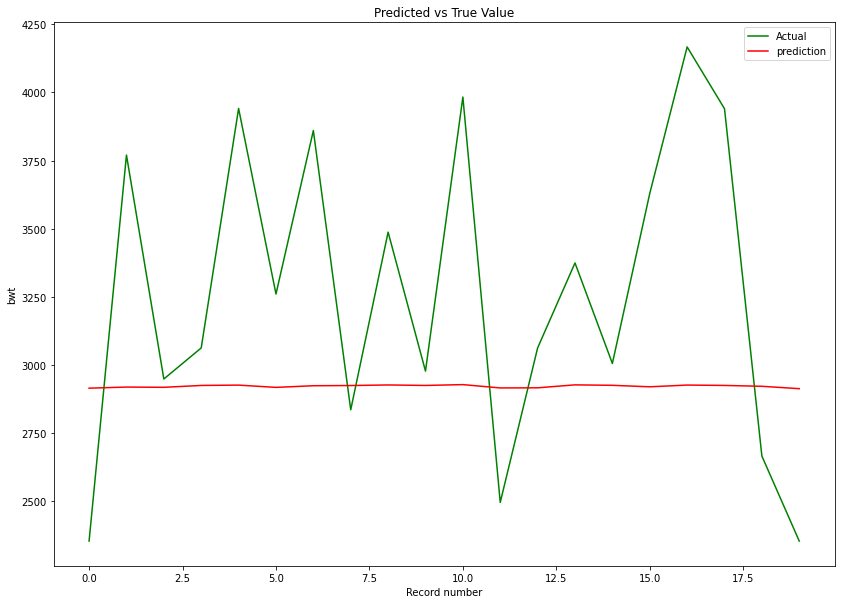

In [15]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(x_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(target)
plt.show()

##### Creator - Vikas Mishra, Github: [Profile](https://github.com/PrajwalNimje1997)